**Business Problem:** Credit card fraud is a significant issue for financial institutions, leading to billions of dollars in annual losses. Detecting fraudulent transactions in real-time is critical to mitigate these losses, protect customers, and maintain trust in the system. However, the imbalanced nature of fraud datasets presents challenges in identifying fraud without disrupting genuine transactions.

**Objective:** Develop a machine learning pipeline to detect fraudulent transactions in credit card data. The solution should:

* Minimize the number of fraudulent transactions missed (False Negatives).
* Reduce the disruption caused by incorrectly flagged transactions (False Positives).
* Provide interpretable insights to enable effective fraud prevention strategies.

**Key Metrics of Success:**

* Recall (Sensitivity):
  Measures how many fraudulent transactions are correctly identified.
  * High recall ensures that most fraud cases are detected.
* Precision: Measures how many flagged transactions are actually fraudulent.
  * High precision reduces disruptions for genuine customers.
* F1-Score: Balances precision and recall.
* AUC-ROC: Evaluates the model’s ability to differentiate between fraud and non-fraud transactions.
* Business Metrics: Evaluate the potential financial savings from reduced fraud losses and the cost of false positives.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn import svm


pd.set_option('display.max_columns', 100)

RFC_METRIC = 'gini'
NUM_ESTIMATORS = 100
NO_JOBS = 4
VALID_SIZE = 0.20
TEST_SIZE = 0.20
#CROSS-VALIDATION
NUMBER_KFOLDS = 5

RANDOM_STATE = 42

MAX_ROUNDS = 1000
EARLY_STOP = 50
OPT_ROUNDS = 1000
VERBOSE_EVAL = 50

# PATH="D:\Data's\creditcard.csv"

In [ ]:
#data_df = pd.read_csv(PATH)
from google.colab import drive
from google.colab import files
drive.mount('/content/drive')
uploaded = files.upload()

Mounted at /content/drive


Saving creditcard.csv to creditcard.csv


In [ ]:
data_df = pd.read_csv('creditcard.csv')

In [ ]:
print("Credit Card Fraud Detection data -  rows:",data_df.shape[0]," columns:", data_df.shape[1])

Credit Card Fraud Detection data -  rows: 284807  columns: 31


In [ ]:
data_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
data_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
print(f"Duplicate rows: {data_df.duplicated().sum()}")
# Removing duplicate rows to avoid skewed analysis and ensure unique transaction records
df = data_df.drop_duplicates()

Duplicate rows: 1081


In [ ]:
# Checking for missing values to identify potential data quality issues
print("Missing values in dataset:\n", df.isnull().sum())

Missing values in dataset:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


## Visualizing Outliers

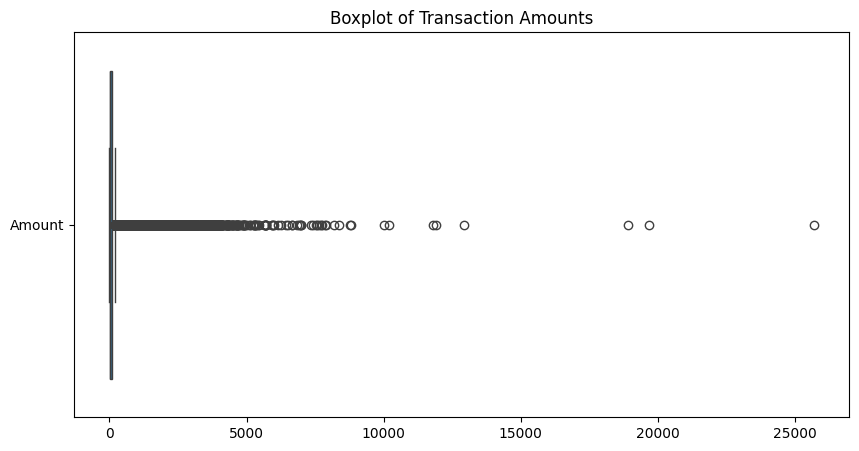

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=data_df[['Amount']], orient='h')
plt.title("Boxplot of Transaction Amounts")
plt.show()

In [ ]:
# Capping non-fraudulent transaction amounts at the 99th percentile to handle outliers
# Fraudulent transactions are retained for better fraud pattern analysis
data_df.loc[(data_df['Class'] == 0).values, 'Amount'] = np.clip(data_df.loc[data_df['Class'] == 0, 'Amount'], None, data_df['Amount'].quantile(0.99))

In [ ]:
df=data_df

## Transaction Types Frequency

In [ ]:
temp= df['Class'].value_counts()

In [ ]:
temp=temp.reset_index()
temp = temp.rename(columns={'count': 'Frequency'})

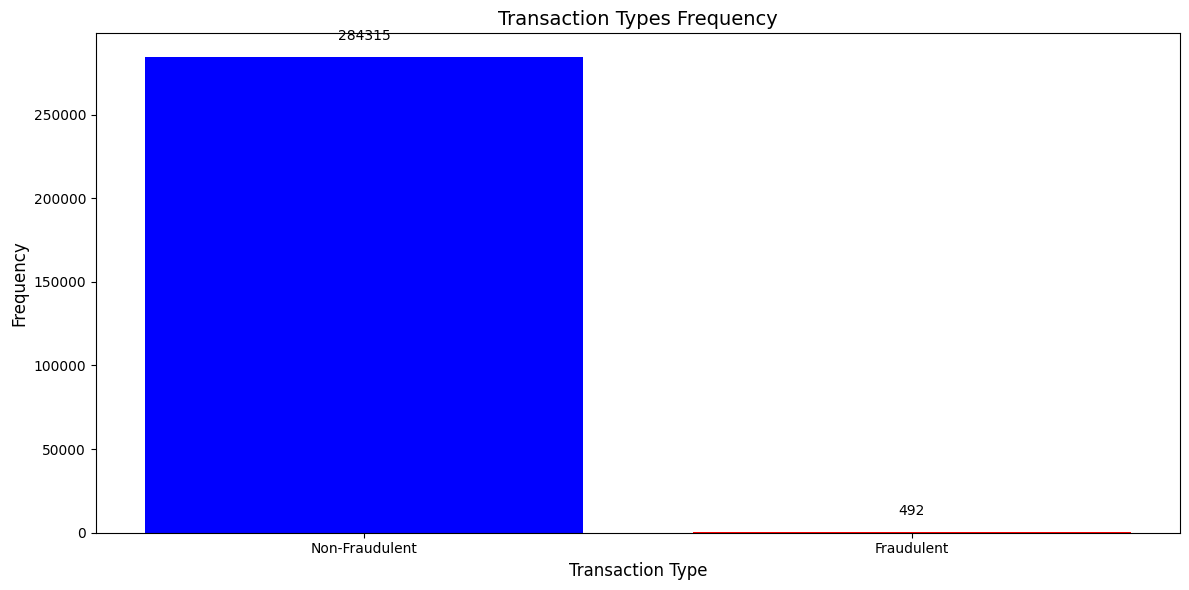

In [ ]:
import matplotlib.pyplot as plt

# Renaming the classes
labels = ['Non-Fraudulent', 'Fraudulent']
frequencies = temp['Frequency']

plt.figure(figsize=(12, 6))
plt.bar(labels, frequencies, color=['blue', 'red'])
plt.title('Transaction Types Frequency', fontsize=14)
plt.xlabel('Transaction Type', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# adding  the count/frequency for the respective class
for i, freq in enumerate(frequencies):
    plt.text(i, freq + 10000, str(freq), ha='center', fontsize=10)

plt.tight_layout()
plt.show()

In [ ]:
# temp
# df.Class=df.Class.astype(str)
# df['Class'] = df['Class'].replace("0", "Not Fraud")
# df['Class'] = df['Class'].replace("1", "Fraud")

## Transaction Types Over Time

In [ ]:
tp3=df[['Class','Time']]

In [ ]:
tp3.Class=tp3.Class.astype(str)
tp3.Class=tp3.Class.replace('0','Not Fraud')
tp3.Class=tp3.Class.replace('1','Fraud')

<ipython-input-17-e9cadae081d4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tp3.Class=tp3.Class.astype(str)
<ipython-input-17-e9cadae081d4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tp3.Class=tp3.Class.replace('0','Not Fraud')
<ipython-input-17-e9cadae081d4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g

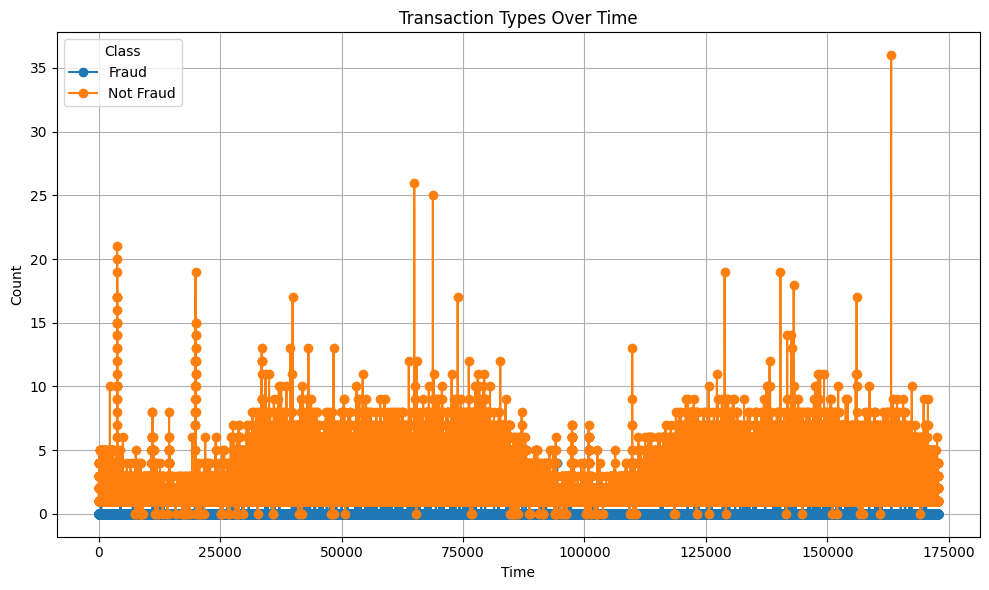

In [ ]:
# Grouping data by Class and Time
grouped_data = tp3.groupby(['Time', 'Class']).size().reset_index(name='Count')
# Pivoting for plotting
pivot_data = grouped_data.pivot(index='Time', columns='Class', values='Count').fillna(0)

#ploting
pivot_data.plot(kind='line', figsize=(10, 6), marker='o')
plt.title('Transaction Types Over Time')
plt.xlabel('Time')
plt.ylabel('Count')
plt.legend(title='Class')
plt.grid(True)
plt.tight_layout()
plt.show()

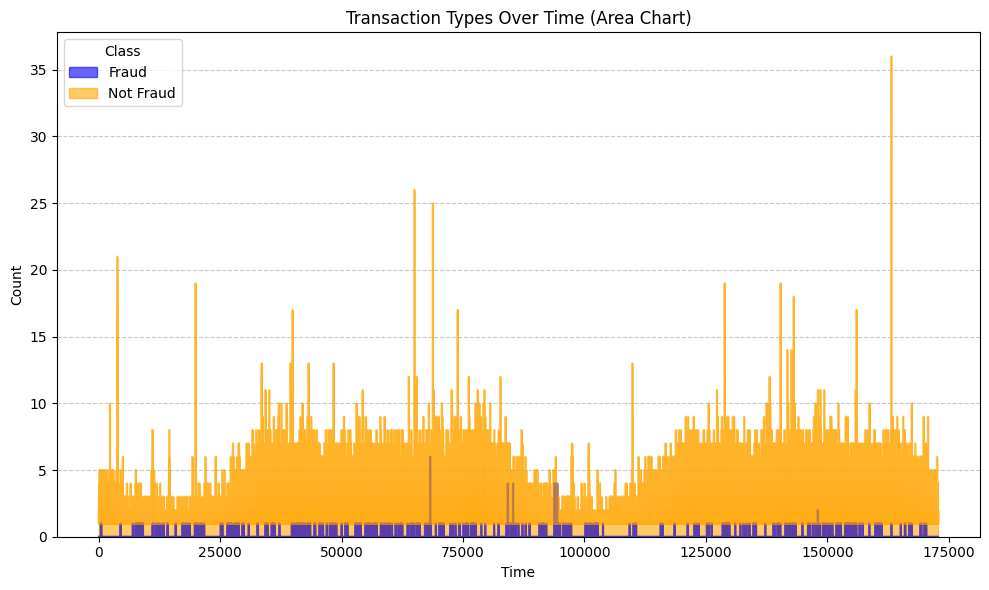

In [ ]:
# Plotting area chart
pivot_data.plot(kind='area', figsize=(10, 6), alpha=0.6, color=['blue', 'orange'])
plt.title('Transaction Types Over Time (Area Chart)')
plt.xlabel('Time')
plt.ylabel('Count')
plt.legend(title='Class')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Correlation Analysis

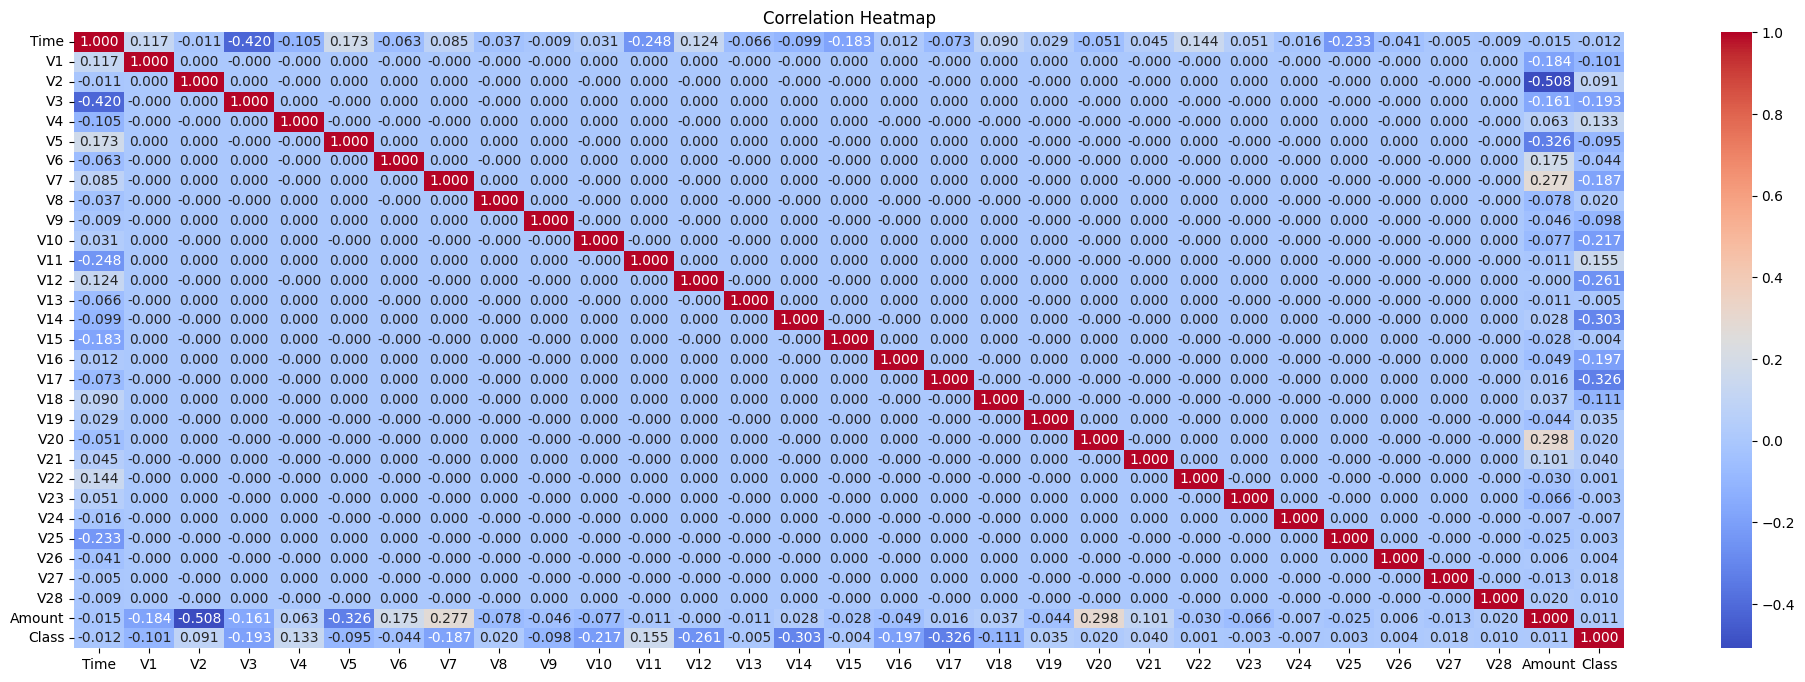

In [ ]:
# Correlation Analysis (Step 2)
correlations = df.corr()
plt.figure(figsize=(25, 8))
sns.heatmap(correlations, cmap="coolwarm", annot=True, fmt='.3f', cbar=True)
plt.title("Correlation Heatmap")
plt.show()

## Transaction Amount Analysis

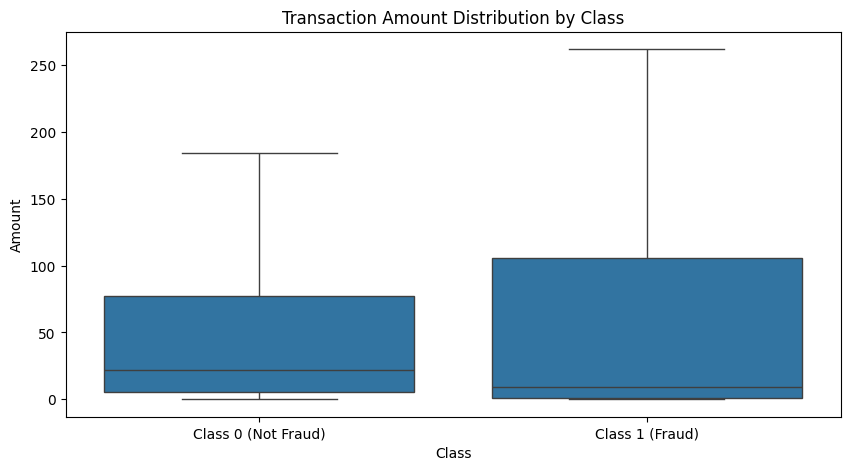

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Class', y='Amount', showfliers=False)# not showing the outliers
plt.title("Transaction Amount Distribution by Class")
plt.xticks(ticks=[0, 1], labels=['Class 0 (Not Fraud)', 'Class 1 (Fraud)'])
plt.xlabel("Class")
plt.ylabel("Amount")
plt.show()

## Analyze the distribution of transaction amounts for each class

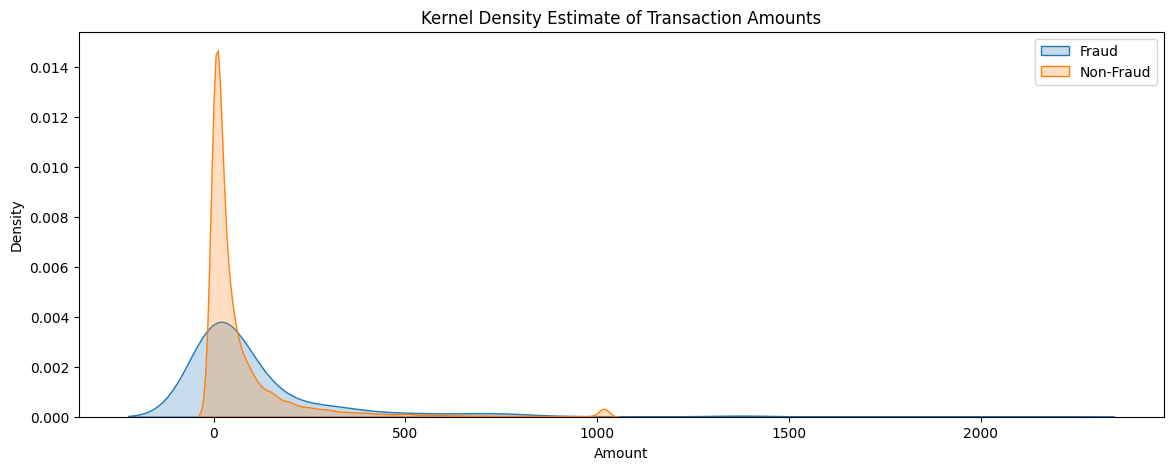

In [ ]:
fraud = df[df['Class'] == 1]['Amount']
non_fraud = df[df['Class'] == 0]['Amount']

plt.figure(figsize=(14, 5))
sns.kdeplot(fraud, label='Fraud', fill=True)
sns.kdeplot(non_fraud, label='Non-Fraud', fill=True)
plt.title("Kernel Density Estimate of Transaction Amounts")
plt.xlabel("Amount")
plt.legend()
plt.show()

## Time-Based Patterns

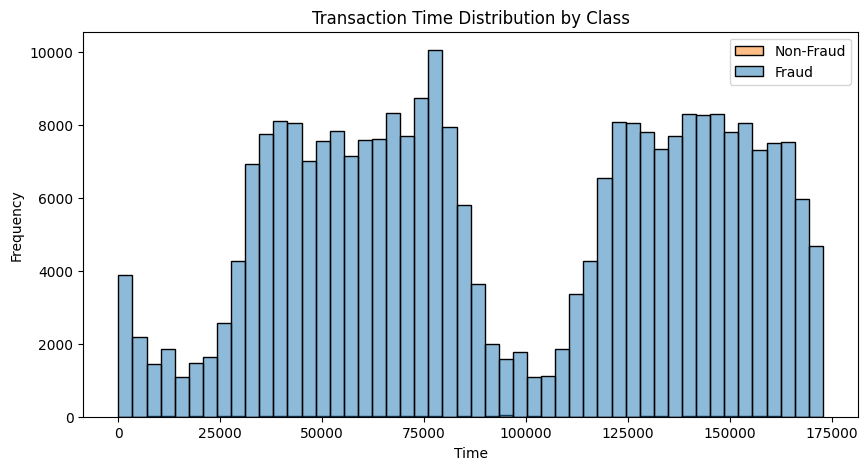

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='Time', hue='Class', bins=50, kde=False)
plt.title("Transaction Time Distribution by Class")
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.legend(['Non-Fraud', 'Fraud'])
plt.show()

## Feature Distributions for Fraud and Non-Fraud

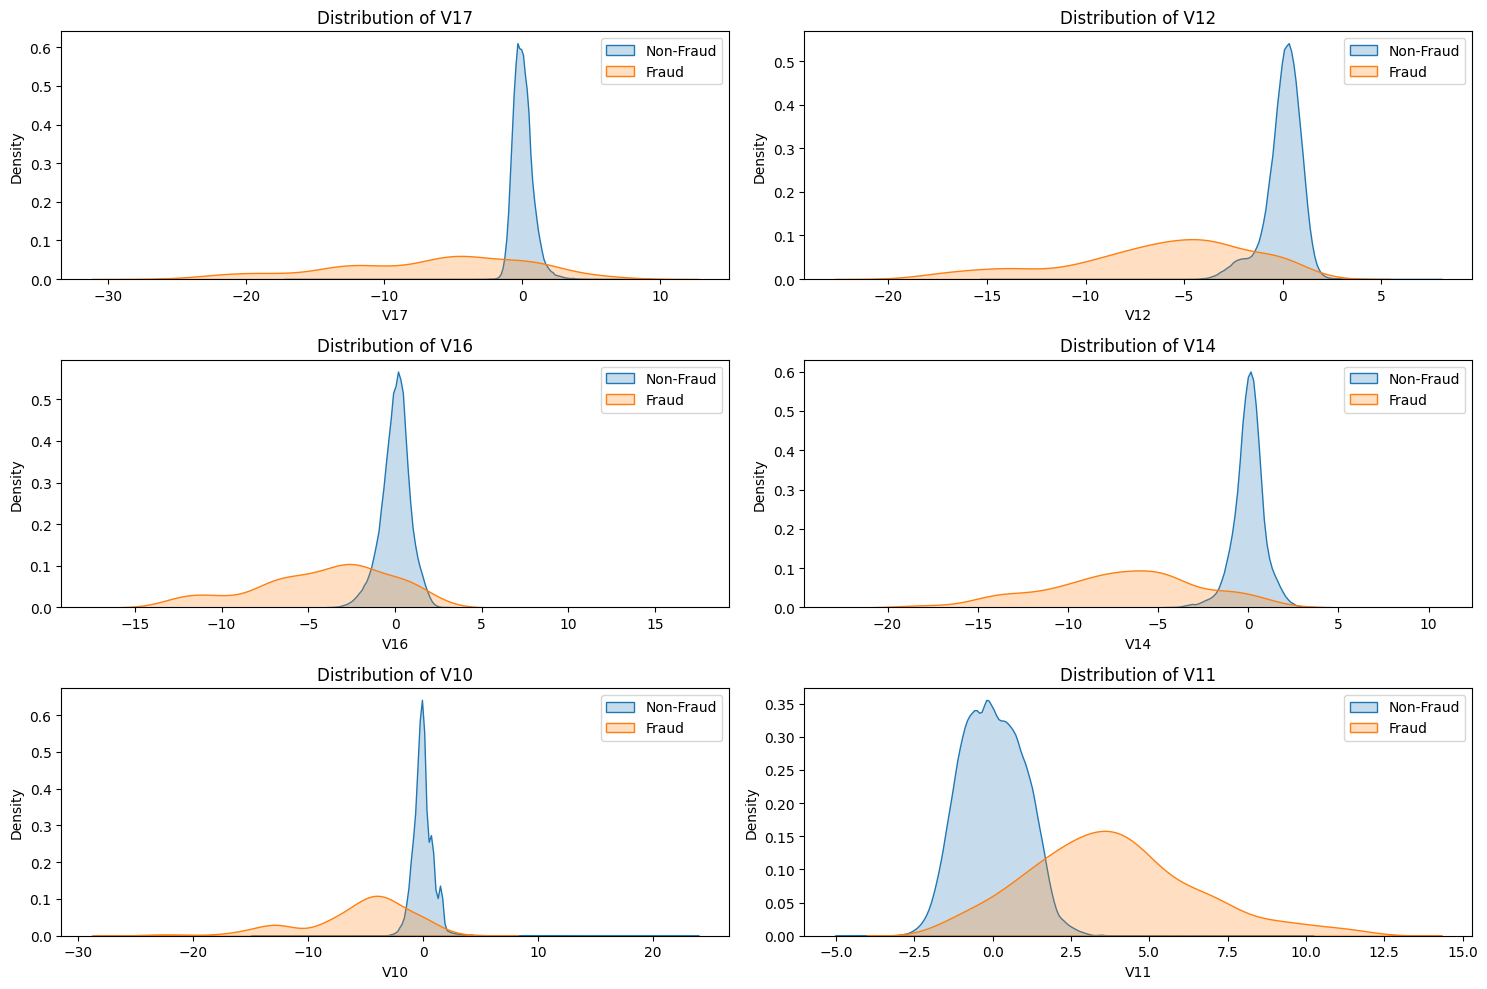

In [ ]:
fraud = df[df['Class'] == 1]
non_fraud = df[df['Class'] == 0]

# Plot distributions for selected features
selected_features = ['V17', 'V12', 'V16', 'V14', 'V10','V11']
plt.figure(figsize=(15, 10))

for i, feature in enumerate(selected_features):
    plt.subplot(3, 2, i + 1)
    sns.kdeplot(non_fraud[feature], label='Non-Fraud', fill=True)
    sns.kdeplot(fraud[feature], label='Fraud', fill=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend()

plt.tight_layout()
plt.show()

## Evaluation of Fraud Patterns (High Amounts and Features)

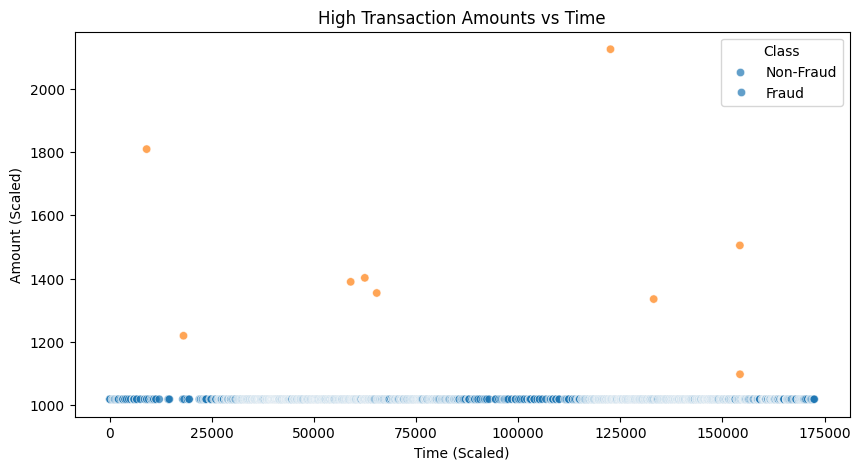

High-amount transactions: 2849
Fraudulent high-amount transactions: 9


In [ ]:
high_amount = df[df['Amount'] > df['Amount'].quantile(0.99)]
fraud_high_amount = high_amount[high_amount['Class'] == 1]

plt.figure(figsize=(10, 5))
sns.scatterplot(data=high_amount, x='Time', y='Amount', hue='Class', alpha=0.7)
plt.title("High Transaction Amounts vs Time")
plt.xlabel("Time (Scaled)")
plt.ylabel("Amount (Scaled)")
plt.legend(title="Class", labels=["Non-Fraud", "Fraud"])
plt.show()

print("High-amount transactions:", len(high_amount))
print("Fraudulent high-amount transactions:", len(fraud_high_amount))

## Analyze Outliers in Fraudulent Transactions

In [ ]:
fraudulent_transactions = df[df['Class'] == 1]

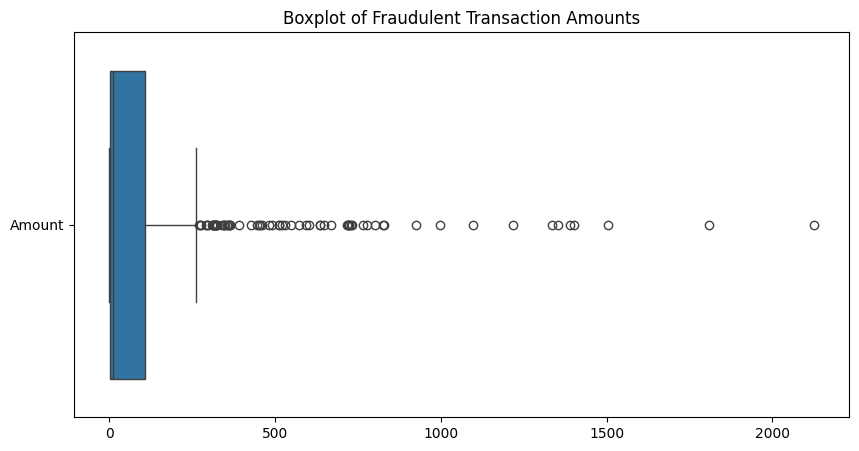

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=fraudulent_transactions[['Amount']], orient='h')
plt.title("Boxplot of Fraudulent Transaction Amounts")
plt.show()

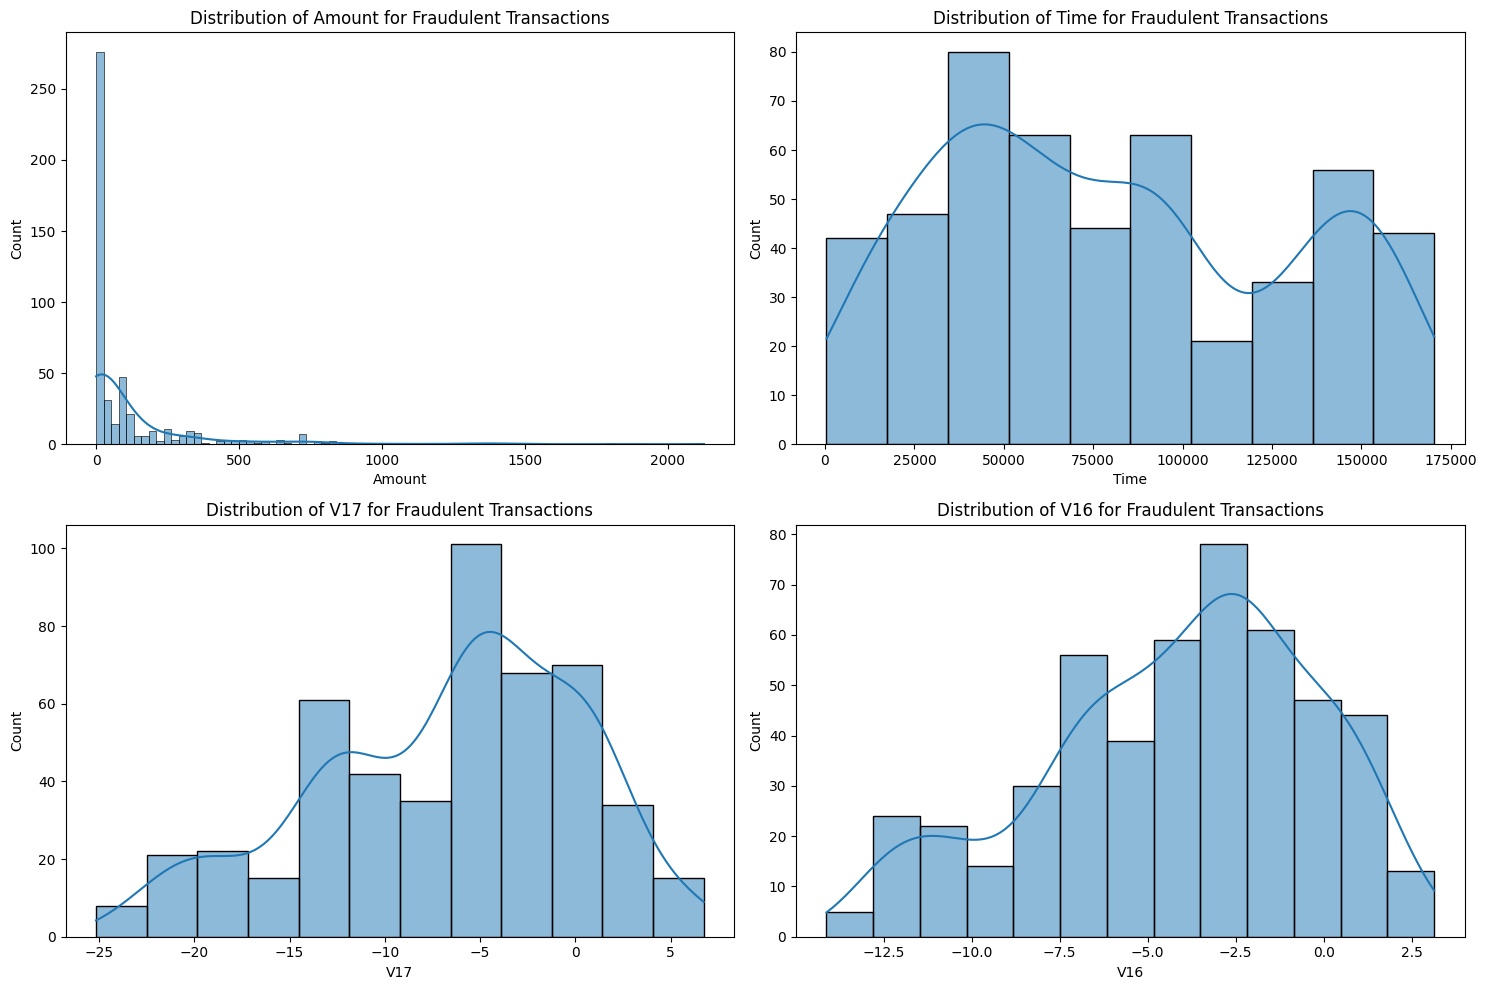

In [ ]:
selected_features = ['Amount', 'Time', 'V17', 'V16']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(selected_features):
    plt.subplot(2, 2, i + 1)
    sns.histplot(fraudulent_transactions[feature], kde=True)
    plt.title(f"Distribution of {feature} for Fraudulent Transactions")
plt.tight_layout()
plt.show()

In [ ]:
Q1 = fraudulent_transactions['Amount'].quantile(0.25)
Q3 = fraudulent_transactions['Amount'].quantile(0.75)
IQR = Q3 - Q1

# outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = fraudulent_transactions[(fraudulent_transactions['Amount'] < lower_bound) |
                                    (fraudulent_transactions['Amount'] > upper_bound)]
print(f"Number of outliers in fraudulent transactions: {len(outliers)}")

Number of outliers in fraudulent transactions: 69


In [ ]:
# Creating a Fraudulent Outlier Flag feature (Feature Engineering)
df['Fraudulent_Outlier_Flag'] = ((df['Amount'] > upper_bound) & (df['Class'] == 1)).astype(int)

In [ ]:
fraudulent_outliers = fraudulent_transactions[(fraudulent_transactions['Amount'] < lower_bound) |
                                               (fraudulent_transactions['Amount'] > upper_bound)]

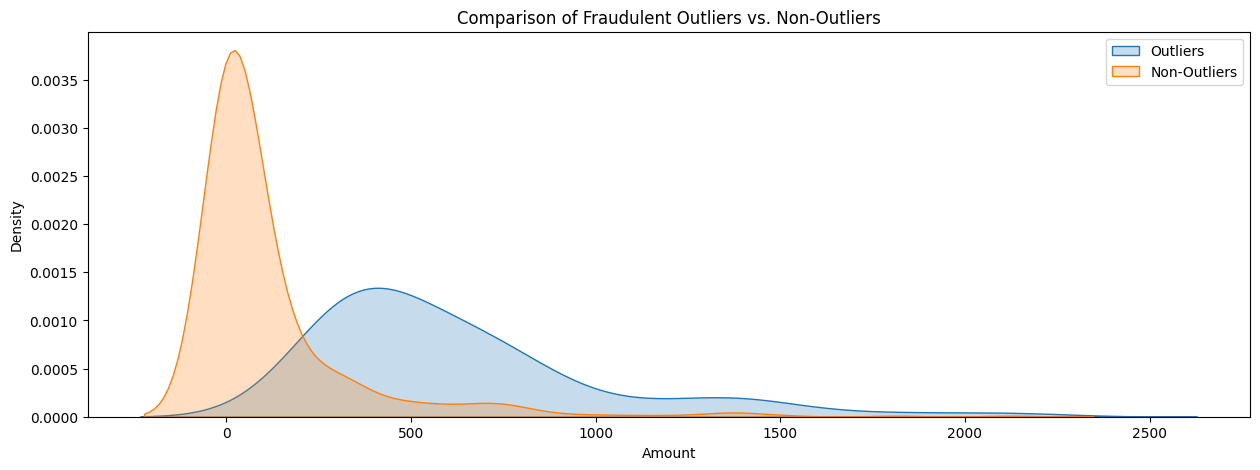

In [ ]:
plt.figure(figsize=(15, 5))
sns.kdeplot(data=fraudulent_outliers, x='Amount', label='Outliers', fill=True)
sns.kdeplot(data=fraudulent_transactions, x='Amount', label='Non-Outliers', fill=True)
plt.title("Comparison of Fraudulent Outliers vs. Non-Outliers")
plt.legend()
plt.show()

In [ ]:
outlier_stats = fraudulent_outliers.describe()
non_outlier_stats = fraudulent_transactions[~fraudulent_transactions.index.isin(outliers.index)].describe()

print("Outliers Summary:\n", outlier_stats)
print("\nNon-Outliers Summary:\n", non_outlier_stats)

Outliers Summary:
                 Time         V1         V2         V3         V4         V5  \
count      69.000000  69.000000  69.000000  69.000000  69.000000  69.000000   
mean    89037.550725  -3.050592   0.619705  -4.499483   3.455640  -2.946178   
std     44384.662738   3.305712   3.226151   4.155155   2.439386   3.458435   
min       472.000000 -16.526507  -7.196980 -18.649853  -1.313275 -13.793819   
25%     58222.000000  -3.586964  -1.155978  -6.374624   1.749293  -4.015477   
50%     84204.000000  -2.144411   0.258555  -3.513408   3.079844  -2.707775   
75%    132086.000000  -1.322789   2.098019  -1.994122   4.894601  -0.863375   
max    169142.000000   1.522080   8.584972   1.265452   9.648311   4.676533   

              V6         V7         V8         V9        V10        V11  \
count  69.000000  69.000000  69.000000  69.000000  69.000000  69.000000   
mean   -0.373085  -1.614205   0.638580  -1.838119  -4.292496   2.737315   
std     1.672492   4.939091   2.271003   2.0

## Feature Engineering

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Fraudulent_Outlier_Flag
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0


In [ ]:
df['Amount_V20_Interaction'] = df['Amount'] * df['V20']
df['V17_V12_Interaction'] = df['V17'] * df['V12']

In [ ]:
df['Amount_V_Interaction'] = df['Amount'] * df['V10']*df['V1']* df['V3']

In [ ]:
df['V17_V16_Interaction'] = df['V17'] * df['V16']

In [ ]:
df['High_V3_Flag'] = (df['V3'] > df['V3'].quantile(0.95)).astype(int)
df['Low_V20_Flag'] = (df['V20'] < df['V20'].quantile(0.05)).astype(int)

In [ ]:
df['Amount_Time_V14'] = df['Amount'] * df['Time'] * df['V14']

In [ ]:
df['Z_Amount'] = (df['Amount'] - df['Amount'].mean()) / df['Amount'].std()

In [ ]:
df['Rolling_Mean_Amount'] = df['Amount'].rolling(window=10).mean().fillna(df['Amount'].mean())

In [ ]:
# Verifying data integrity post-cleaning
print("Dataframe shape after preprocessing:", df.shape)
print("Fraudulent transactions after cleaning:", df['Class'].sum())

Dataframe shape after preprocessing: (284807, 41)
Fraudulent transactions after cleaning: 492


In [ ]:
df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Fraudulent_Outlier_Flag,Amount_V20_Interaction,V17_V12_Interaction,Amount_V_Interaction,V17_V16_Interaction,High_V3_Flag,Low_V20_Flag,Amount_Time_V14,Z_Amount,Rolling_Mean_Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0,37.616278,-0.128485,-46.852586,-0.097830,1,0,-0.000000,0.435474,80.20635
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0,-0.185834,-0.122294,-0.089123,-0.053260,0,0,-0.000000,-0.486307,80.20635
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0,198.788823,0.073351,-189.382323,-3.207904,0,0,-62.837083,1.872381,80.20635


In [ ]:
from sklearn.model_selection import train_test_split

# Defining features and target
X = df.drop(columns=['Class'])  # Excluding the target(y-Class)
y = df['Class']

# Spliting the data to avoid data leakeage while scaling the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Define all numerical features
from sklearn.preprocessing import StandardScaler
new_features =['Amount_V20_Interaction'	,'V17_V12_Interaction'	,'Amount_V_Interaction',	'V17_V16_Interaction'	,'High_V3_Flag'	,'Low_V20_Flag'	,'Amount_Time_V14'	,'Z_Amount'	,'Rolling_Mean_Amount']
num_features = ['Time', 'Amount'] + new_features + [f'V{i}' for i in range(1, 29)]

# Standardize numerical features
scaler = StandardScaler()

# Fit on training data
X_train[num_features] = scaler.fit_transform(X_train[num_features])

# Transform test data
X_test[num_features] = scaler.transform(X_test[num_features])


## Feature Importance using RandomForest

In [ ]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Applying SMOTE (Synthetic Minority Oversampling Technique) to address class imbalance
# Ensures that the model learns fraud patterns effectively without being biased toward the majority class
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

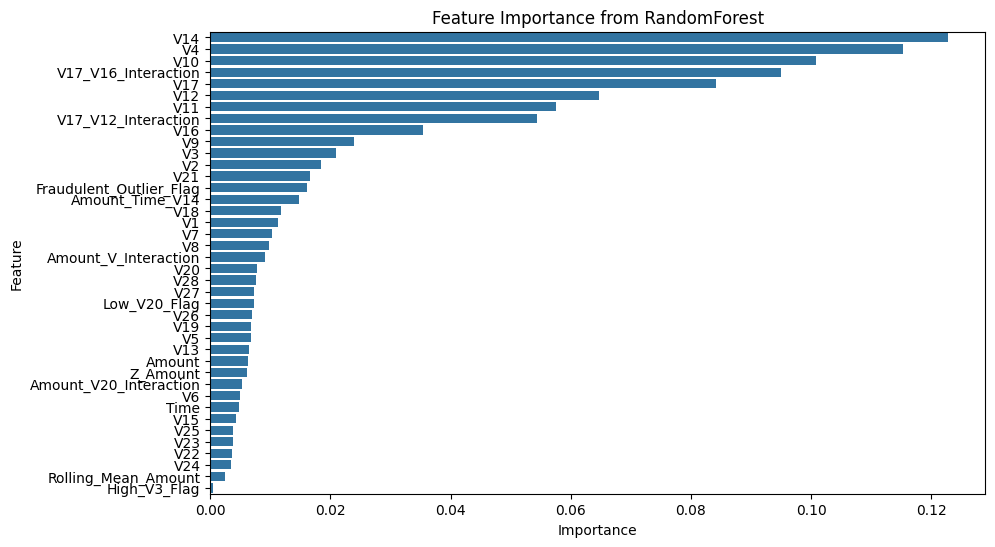

In [ ]:
# Trainig a RandomForest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_smote, y_train_smote)

# Feature Importance Plot
importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': clf.feature_importances_})
importances = importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=importances, x='Importance', y='Feature')
plt.title("Feature Importance from RandomForest")
plt.show()

In [ ]:
from sklearn.metrics import classification_report

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.88      0.86      0.87        98

    accuracy                           1.00     56962
   macro avg       0.94      0.93      0.93     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
y_test_proba = clf.predict_proba(X_test)[:, 1]# Predict probabilities for fraud (Class=1)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# AUC-ROC score
print("AUC-ROC Score:", roc_auc_score(y_test, y_test_proba))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.88      0.86      0.87        98

    accuracy                           1.00     56962
   macro avg       0.94      0.93      0.93     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
 [[56852    12]
 [   14    84]]
AUC-ROC Score: 0.9694590853364418


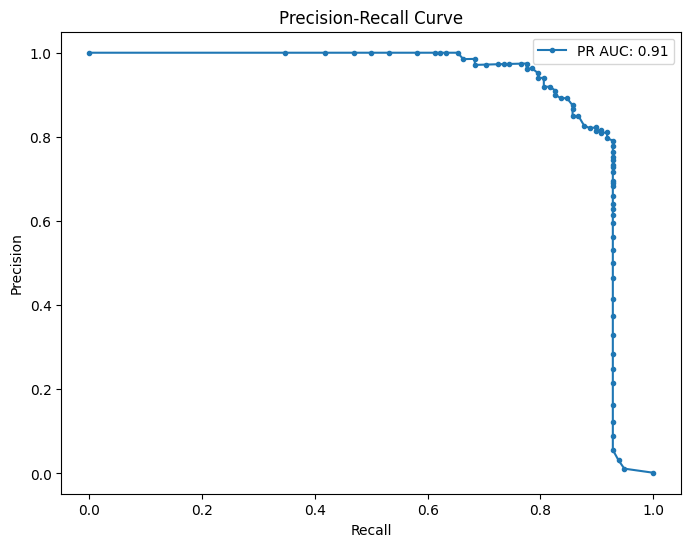

In [ ]:
from sklearn.metrics import precision_recall_curve, roc_auc_score, auc

# Compute precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_test_proba)

# Compute AUC for precision-recall curve
pr_auc = auc(recall, precision)

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label=f"PR AUC: {pr_auc:.2f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()

In [ ]:
X_test_with_predictions = X_test.copy()
X_test_with_predictions['Fraud_Prediction'] = y_pred
X_test_with_predictions['Fraud_Probability'] = y_test_proba

# Filter fraudulent transactions
fraudulent_transactions = X_test_with_predictions[X_test_with_predictions['Fraud_Prediction'] == 1]
print("Number of Fraudulent Transactions Detected:", len(fraudulent_transactions))


Number of Fraudulent Transactions Detected: 96


In [ ]:
X_test_rf_predictions = X_test.copy()
X_test_rf_predictions['Class'] = y_test.values
X_test_rf_predictions['Fraud_Prediction_RF'] = clf.predict(X_test)
X_test_rf_predictions['Fraud_Probability_RF'] = clf.predict_proba(X_test)[:, 1]
# Filter fraudulent transactions flagged by Random Forest
fraudulent_transactions_rf = X_test_rf_predictions[X_test_rf_predictions['Fraud_Prediction_RF'] == 1]

# Calculate total flagged fraudulent amount
total_flagged_amount_rf = fraudulent_transactions_rf['Amount'].sum()

In [ ]:
total_fraud_amount = fraudulent_transactions['Amount'].sum()
print("Total Amount Flagged as Fraudulent:", total_fraud_amount)

Total Amount Flagged as Fraudulent: 11.117918089346432


In [ ]:
important_features = importances[importances['Importance'] > 0.007]['Feature']
important_features = list(important_features) + ['Time', 'Amount']

In [ ]:
# X_train = X_train[important_features]
# X_test = X_test[important_features]

In [ ]:
print(confusion_matrix(y_test, y_pred))

[[56852    12]
 [   14    84]]


# Improved Random forest

In [ ]:
from sklearn.model_selection import  StratifiedKFold
from sklearn.model_selection import HalvingRandomSearchCV
# RandomizedSearchCV for Hyperparameter Tuning
param_dist = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2'],
    'class_weight': ['balanced']
}
# using HalvingRandomSearchCV insted of randomsearchCV for faster parameter tuning
halving_search = HalvingRandomSearchCV(
    RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    factor=2,  # Aggressive narrowing of search space
    min_resources=1000,
    scoring='roc_auc',
    cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=42),
    random_state=42,
    n_jobs=-1,
    verbose=1
)

halving_search.fit(X_train_smote, y_train_smote)

# Best model from RandomizedSearchCV
best_rf = halving_search.best_estimator_
print("Best Parameters:", halving_search.best_params_)


n_iterations: 6
n_required_iterations: 6
n_possible_iterations: 9
min_resources_: 1000
max_resources_: 454902
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 32
n_resources: 1000
Fitting 3 folds for each of 32 candidates, totalling 96 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 32 is smaller than n_iter=454. Running 32 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


----------
iter: 1
n_candidates: 16
n_resources: 2000
Fitting 3 folds for each of 16 candidates, totalling 48 fits
----------
iter: 2
n_candidates: 8
n_resources: 4000
Fitting 3 folds for each of 8 candidates, totalling 24 fits
----------
iter: 3
n_candidates: 4
n_resources: 8000
Fitting 3 folds for each of 4 candidates, totalling 12 fits
----------
iter: 4
n_candidates: 2
n_resources: 16000
Fitting 3 folds for each of 2 candidates, totalling 6 fits
----------
iter: 5
n_candidates: 1
n_resources: 32000
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 20, 'class_weight': 'balanced'}


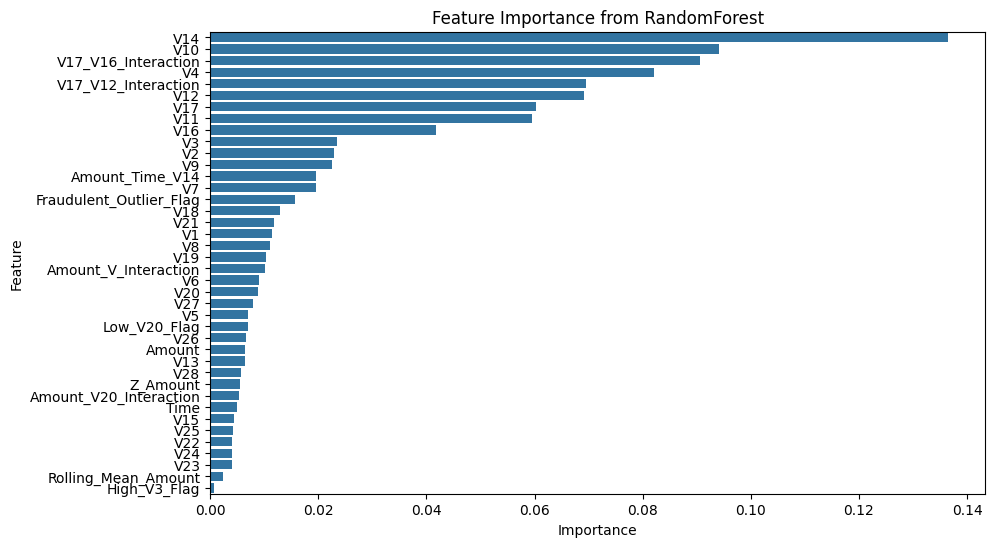

In [ ]:
# Train the best RandomForest model
best_rf.fit(X_train_smote, y_train_smote)

# Feature Importance Plot
importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': best_rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=importances, x='Importance', y='Feature')
plt.title("Feature Importance from RandomForest")
plt.show()

In [ ]:
# Predictions and Evaluation
y_pred = best_rf.predict(X_test)
y_test_proba = best_rf.predict_proba(X_test)[:, 1]

In [ ]:
# Classification Report and Confusion Matrix
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# AUC-ROC Score
roc_auc = roc_auc_score(y_test, y_test_proba)
print("AUC-ROC Score:", roc_auc)

# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_test_proba)
pr_auc = auc(recall, precision)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.82      0.89      0.85        98

    accuracy                           1.00     56962
   macro avg       0.91      0.94      0.93     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
 [[56845    19]
 [   11    87]]
AUC-ROC Score: 0.9777058473924178


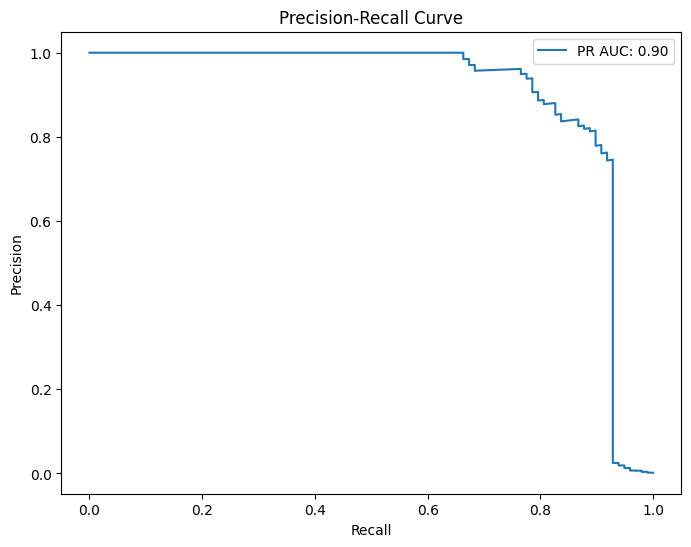

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f"PR AUC: {pr_auc:.2f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()

In [ ]:

# Fraudulent Transactions Analysis
X_test_with_predictions = X_test.copy()
X_test_with_predictions['Fraud_Prediction'] = y_pred
X_test_with_predictions['Fraud_Probability'] = y_test_proba

fraudulent_transactions = X_test_with_predictions[X_test_with_predictions['Fraud_Prediction'] == 1]
print("Number of Fraudulent Transactions Detected:", len(fraudulent_transactions))

total_fraud_amount = fraudulent_transactions['Amount'].sum()
print("Total Amount Flagged as Fraudulent:", total_fraud_amount)

Number of Fraudulent Transactions Detected: 106
Total Amount Flagged as Fraudulent: 11.72302673489034


In [ ]:
amount_mean = scaler.mean_[num_features.index('Amount')]
amount_std = scaler.scale_[num_features.index('Amount')]

# column with the original 'Amount' values
X_test_with_predictions['Original_Amount'] = (
    X_test_with_predictions['Amount'] * amount_std + amount_mean
)

# Filtering fraudulent transactions
fraudulent_transactions = X_test_with_predictions[X_test_with_predictions['Fraud_Prediction'] == 1]

# total flagged fraud amount in original values
total_fraud_amount = fraudulent_transactions['Original_Amount'].sum()
print("Total Amount Flagged as Fraudulent (Original Scale):", total_fraud_amount)

Total Amount Flagged as Fraudulent (Original Scale): 10355.91


In [ ]:
# Selecting Important Features
important_features = importances[importances['Importance'] > 0.007]['Feature']
important_features = list(important_features) + ['Time', 'Amount']

# X_train = X_train[important_features]
# X_test = X_test[important_features]

## XGboost

In [ ]:
pip install --upgrade xgboost

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.40      0.92      0.55        98

    accuracy                           1.00     56962
   macro avg       0.70      0.96      0.78     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
 [[56727   137]
 [    8    90]]
AUC-ROC Score: 0.984431166951868


100%|===================| 56815/56962 [05:44<00:00]       

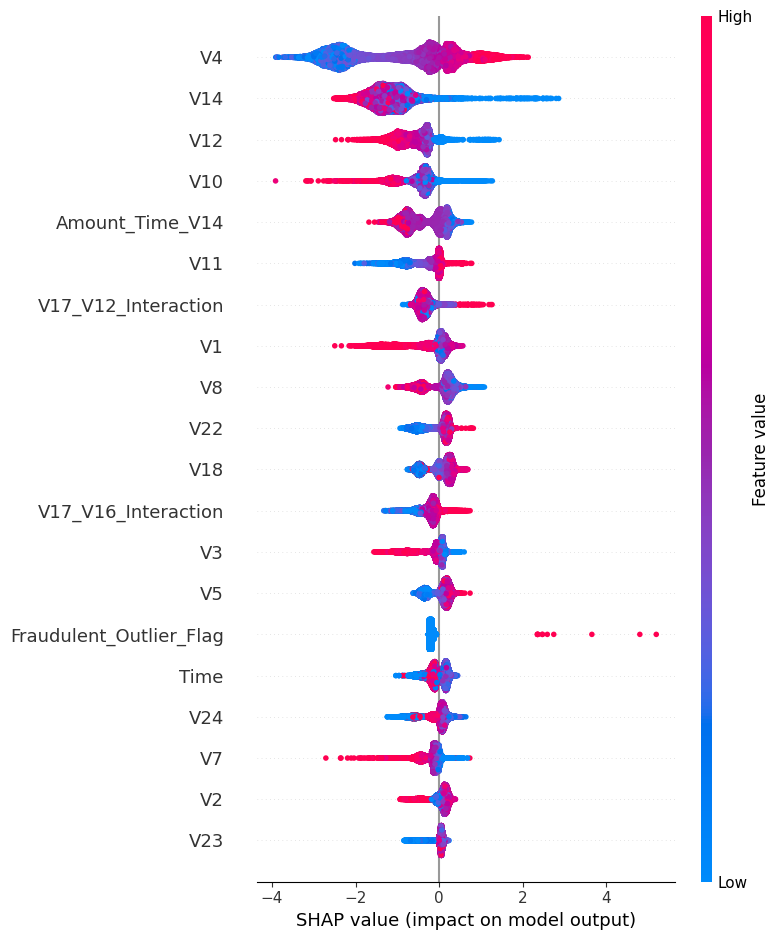

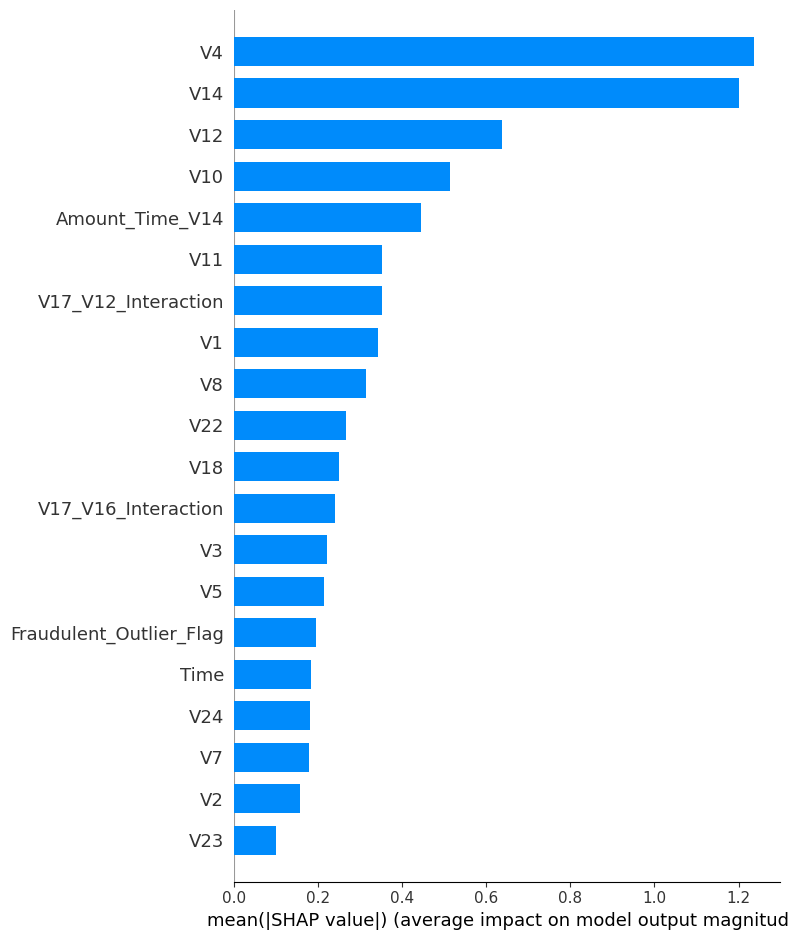

<Figure size 1000x600 with 0 Axes>

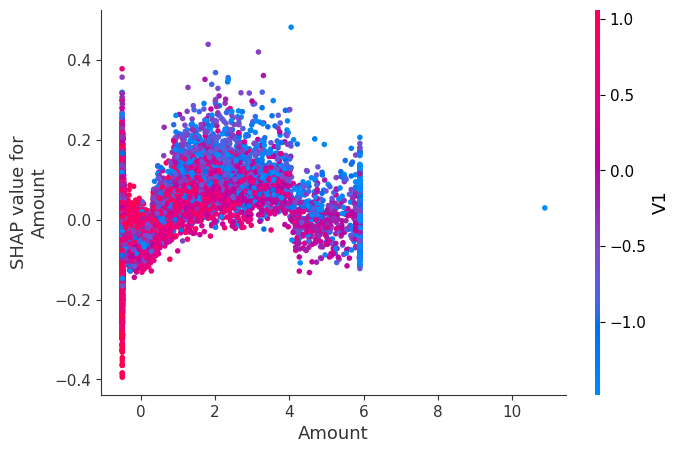

Number of Fraudulent Transactions Detected: 227
Total Fraudulent Amount Flagged: 20551.38


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE
import shap
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Initializing XGBoost
xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
xgb_model.fit(X_train_smote, y_train_smote)

# Predictions
y_pred = xgb_model.predict(X_test)
y_test_proba = xgb_model.predict_proba(X_test)[:, 1]

# Evaluation Metrics
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("AUC-ROC Score:", roc_auc_score(y_test, y_test_proba))

# SHAP
explainer = shap.Explainer(xgb_model, X_train_smote)
shap_values = explainer(X_test)

# Summary plot
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test)

# Feature importance using SHAP
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test, plot_type="bar")

# Visualizing 1 prediction
sample_index = 0
shap.force_plot(
    explainer.expected_value,
    shap_values[sample_index].values,
    X_test.iloc[sample_index]
)

# Visualize SHAP dependence for amount
feature_name = "Amount"
plt.figure(figsize=(10, 6))
shap.dependence_plot(feature_name, shap_values.values, X_test)

# Fraudulent Transactions Analysis
X_test_with_predictions = X_test.copy()
X_test_with_predictions['Fraud_Prediction'] = y_pred
X_test_with_predictions['Fraud_Probability'] = y_test_proba

fraudulent_transactions = X_test_with_predictions[X_test_with_predictions['Fraud_Prediction'] == 1]
print("Number of Fraudulent Transactions Detected:", len(fraudulent_transactions))

if 'Amount' in X_test_with_predictions.columns:
    amount_mean = scaler.mean_[num_features.index('Amount')]
    amount_std = scaler.scale_[num_features.index('Amount')]

    # Reverse scaling for Amount to original value
    X_test_with_predictions['Original_Amount'] = (
        X_test_with_predictions['Amount'] * amount_std + amount_mean
    )
    fraudulent_amounts = X_test_with_predictions.loc[
        X_test_with_predictions['Fraud_Prediction'] == 1, 'Original_Amount'
    ]
    print(f"Total Fraudulent Amount Flagged: {fraudulent_amounts.sum():.2f}")


## potential Savings

In [ ]:
# actual_fraudulent_detected

In [ ]:
X_test_with_predictions = X_test.copy()
X_test_with_predictions['Fraud_Prediction'] = y_pred
X_test_with_predictions['Fraud_Probability'] = y_test_proba
X_test_with_predictions['Class'] = y_test.values  # Add the target labels back for analysis

# Reverse scaling for Amount to original scale
amount_mean = scaler.mean_[num_features.index('Amount')]
amount_std = scaler.scale_[num_features.index('Amount')]
X_test_with_predictions['Original_Amount'] = (
    X_test_with_predictions['Amount'] * amount_std + amount_mean
)

# Calculating the total detected fraudulent amount in original scale
actual_fraudulent_detected = X_test_with_predictions[(X_test_with_predictions['Fraud_Prediction'] == 1) & (X_test_with_predictions['Class'] == 1)]
actual_fraudulent_amount = actual_fraudulent_detected['Original_Amount'].sum()

# Total fraudulent amount flagged is
total_fraud_amount = X_test_with_predictions[X_test_with_predictions['Fraud_Prediction'] == 1]['Original_Amount'].sum()

# Calculating the savings percentage
if total_fraud_amount > 0:
    savings_percentage = (actual_fraudulent_amount / total_fraud_amount) * 100
else:
    savings_percentage = 0

print(f"Total Fraudulent Amount Flagged: {total_fraud_amount:.2f}")
print(f"Actual Fraudulent Amount Detected: {actual_fraudulent_amount:.2f}")
print(f"Savings Percentage: {savings_percentage:.2f}%")

# False Positive Costs
false_positives = X_test_with_predictions[(X_test_with_predictions['Fraud_Prediction'] == 1) & (X_test_with_predictions['Class'] == 0)]
false_positive_rate = (len(false_positives) / len(X_test)) * 100
print(f"False Positive Rate: {false_positive_rate:.2f}%")

Total Fraudulent Amount Flagged: 20551.38
Actual Fraudulent Amount Detected: 10502.43
Savings Percentage: 51.10%
False Positive Rate: 0.24%


# Profiling Fraudulent Transactions

In [ ]:
# Profiling Fraudulent Transactions
# Fraud Profiles
fraud_profiles = X_test_with_predictions.groupby('Fraud_Prediction')['Original_Amount'].agg(['count', 'mean', 'sum'])
print(fraud_profiles)

                  count       mean         sum
Fraud_Prediction                              
0                 56735  80.505120  4567457.98
1                   227  90.534714    20551.38


# Visualization

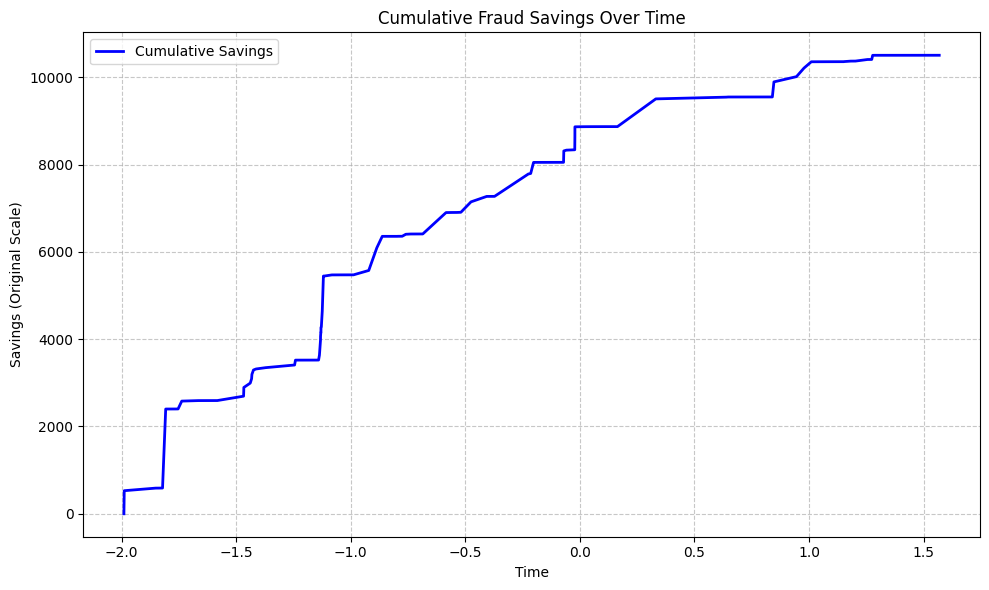

In [ ]:
# Savings Over Time
cumulative_savings = actual_fraudulent_detected.groupby('Time')['Original_Amount'].sum().cumsum()
plt.figure(figsize=(10, 6))
plt.plot(cumulative_savings, label='Cumulative Savings', color='blue', linewidth=2)
plt.xlabel('Time')
plt.ylabel('Savings (Original Scale)')
plt.title('Cumulative Fraud Savings Over Time')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()